### Guided Project: Credit Card Customer Segmentation

The data contains information about credit card company clients. The goal of the project is as a data scientist to analyse the data and segement them in to different groups to apply different business strategies for each type of customer. 

The data dictionary:

* customer_id: unique identifier for each customer.
* age: customer age in years.
* gender: customer gender (M or F).
* dependent_count: number of dependents of each customer.
* education_level: level of education ("High School", "Graduate", etc.).
* marital_status: marital status ("Single", "Married", etc.).
* estimated_income: the estimated income for the customer projected by the data science team.
* months_on_book: time as a customer in months.
* total_relationship_count: number of times the customer contacted the company.
* months_inactive_12_mon: number of months the customer did not use the credit card in the last 12 months.
* credit_limit: customer's credit limit.
* total_trans_amount: the overall amount of money spent on the card by the customer.
* total_trans_count: the overall number of times the customer used the card.
* avg_utilization_ratio: daily average utilization ratio.

We will follow the below steps to achieve the targets.

* Exploratory Data Analysis
* Prepare the data for modeling
* Feature Engineering
* Segment the data
* Interpret and results

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#read the customers data set
customers = pd.read_csv('customer_segmentation.csv')

### Exploratory Data Analysis

In [4]:
size = customers.shape
print('The customers data set has {} rows and {} columns'.format(size[0], size[1]))

The customers data set has 10127 rows and 14 columns


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

In [7]:
# checking for null values
customers.isnull().sum()

customer_id                 0
age                         0
gender                      0
dependent_count             0
education_level             0
marital_status              0
estimated_income            0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
credit_limit                0
total_trans_amount          0
total_trans_count           0
avg_utilization_ratio       0
dtype: int64

cat_cols = ['gender', 'education_level', 'marital_status']From the above results we can see there is columns with integer, string and float data types in the data set and also there is no null values in all columns.

In [21]:
#display the value counts of the categorical columns
cat_cols = ['gender', 'education_level', 'marital_status']

for col in cat_cols:
    print('Value count of {} column'.format(col))
    print(customers[col].value_counts())
    print()   

Value count of gender column
F    5358
M    4769
Name: gender, dtype: int64

Value count of education_level column
Graduate         3685
High School      2351
Uneducated       1755
College          1192
Post-Graduate     616
Doctorate         528
Name: education_level, dtype: int64

Value count of marital_status column
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: marital_status, dtype: int64



<AxesSubplot:>

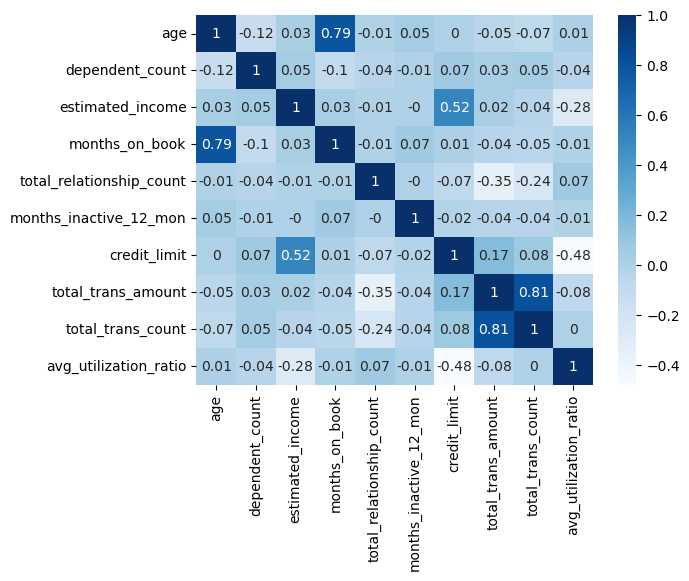

In [23]:
#get the numeric values to calculate the correlation
numeric_col = customers.select_dtypes(include = np.number)
numeric_col = numeric_col.drop('customer_id', axis = 1)

#calculate the correlation
cus_corr = numeric_col.corr()
cus_corr = round(cus_corr,2)

#display the heatmap
sns.heatmap(data = cus_corr, annot = True, cmap = 'Blues')

from the above graph we can see that there is some columns strongly and weekly correlated with the columns
* age is positively correlated with months_on_book
* estimated_income is positively correlated with credit_limit
* total_trans_amount is positively corrected with total_trans_count
* estimated_income is weekly correlated with avg_utilization_ratio

#### Display the histogram for all numeric columns

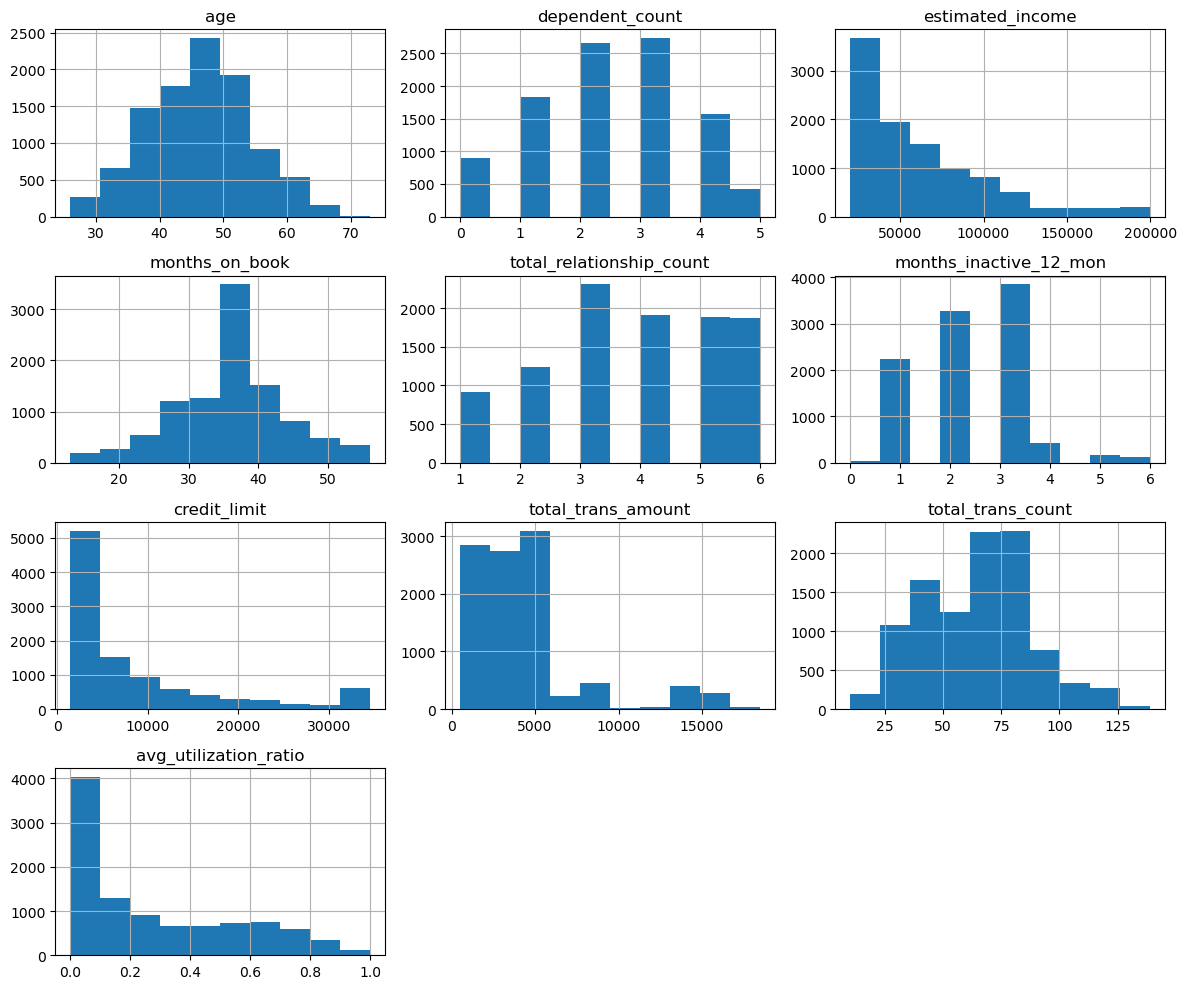

In [24]:
plot_df = customers.drop('customer_id', axis=1)
plot_df.hist(figsize = (12,10))
plt.tight_layout()
plt.show()

### Feature Engineering

* We will first consider the catergorical columns. There is 3 catergorical columns in the data set, 'gender', 'education_level' and 'marital_status'. 
* We will first transform these columns to numeric columns.

In [25]:
#making a copy of the dataframe
customer_modif =  customers.copy()

#transform the gender column, 'Male' as 1 and 'Female' as 0
customer_modif['gender'] = customer_modif['gender'].apply(lambda x: 1 if x == 'M' else 0)

In [26]:
#transform the education_level column categorize from 0 to 5
education_dict = {'Uneducated' :0, 'High School':1, 'College':2,'Graduate': 3,'Post-Graduate':4,
'Doctorate':5}

#assign the education_dict to the column
customer_modif['education_level'] = customer_modif['education_level'].map(education_dict)

For the marital_status column we will using one-hot encoding to generate dummy variables for this column.

In [27]:
customer_modif.marital_status.value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: marital_status, dtype: int64

In [38]:
customer_modif.head(3)
customer_modif.shape

(10127, 14)

In [28]:
#one-hot encode for the marital_status column
dummies = pd.get_dummies(customer_modif, columns = ['marital_status'])
new_df = dummies.copy()
print(new_df.shape)
new_df.head(3)

(10127, 17)


,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown
0,768805383,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,0,1,0,0
1,818770008,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,0,0,1,0
2,713982108,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,0,1,0,0


### Scaling the data

In [34]:
X = new_df.drop('customer_id', axis = 1)

#Initiate scaler
scaler = StandardScaler()

In [36]:
#fit and transform data and assign to scaled_X
scaled_X = scaler.fit_transform(X)
scaled_X

array([[-0.16540558,  1.05995565,  0.50336813, ...,  1.07733799,
        -0.79850685, -0.28260887],
       [ 0.33357038, -0.9434357 ,  2.04319867, ..., -0.92821381,
         1.2523374 , -0.28260887],
       [ 0.58305837,  1.05995565,  0.50336813, ...,  1.07733799,
        -0.79850685, -0.28260887],
       ...,
       [-0.29014957, -0.9434357 , -1.03646242, ...,  1.07733799,
        -0.79850685, -0.28260887],
       [-2.03656544,  1.05995565, -0.26654715, ..., -0.92821381,
        -0.79850685,  3.53845931],
       [-0.41489356, -0.9434357 , -0.26654715, ...,  1.07733799,
        -0.79850685, -0.28260887]])

In [37]:
#convert the scaled data to dataframe
X_df = pd.DataFrame(scaled_X)
X_df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.165406,1.059956,0.503368,-0.752211,0.175810,0.384621,0.763943,-1.327136,0.446622,-0.959707,-0.973895,-0.775882,-0.282405,1.077338,-0.798507,-0.282609
1,0.333570,-0.943436,2.043199,0.662787,-0.967166,1.010715,1.407306,-1.327136,-0.041367,-0.916433,-1.357340,-0.616276,-0.282405,-0.928214,1.252337,-0.282609
2,0.583058,1.059956,0.503368,0.662787,0.785397,0.008965,0.120579,-1.327136,-0.573698,-0.740982,-1.911206,-0.997155,-0.282405,1.077338,-0.798507,-0.282609


### Choosing the K

After we have scaled the data set we can now perform the KMeans clustering for the data set. We will first calculate the optimal clusters for the model (the k value). We will use the k value from 1 to 10 and calculate the inertia for each of the the K value and plot the Elbow Curve to decide the best K value for the model.

In [42]:
#list to store the inertia values of the model
inertia_list = []
for k in range(1,11):
    model = KMeans(n_clusters = k,n_init=10)
    y = model.fit_predict(X_df)
    inertia = model.inertia_ 
    inertia_list.append(inertia)
    

In [40]:
inertia_list

[162031.99999999997,
 144649.74481322523,
 132794.94933282232,
 121744.78860517012,
 111788.49746351992,
 103874.76140522747,
 98669.23298300263,
 94563.76965155176,
 91184.76652285905,
 88896.80614418174]

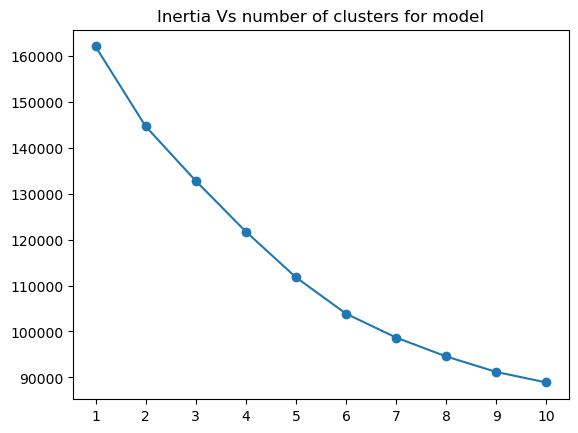

In [41]:
plt.plot(list(range(1,11)),  inertia_list, marker ='o')
plt.xticks(range(1,11))
plt.title('Inertia Vs number of clusters for model')
plt.show()

From the above graph we can see that the inertia decreases with the number of clusters. The ideal number of clusters are determined by the elbow point of the graph. From the above grpah we will be using k = 6.
As shown above in the graph k=6 (6 clusters) will be the closest accurate K value for the model.

In [43]:
model = KMeans(n_clusters = 6)
predictions = model.fit_predict(X_df)

customers['CLUSTER'] = predictions +1
customers['CLUSTER'].value_counts()

3    3264
5    2872
4    1645
2     867
1     740
6     739
Name: CLUSTER, dtype: int64

### Analysing Results

We will plot the graph displaying the count for each cluster

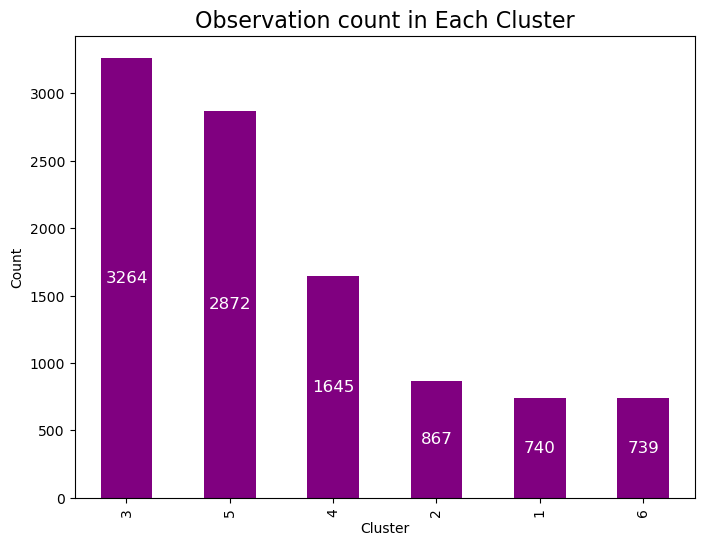

In [58]:
#value counts of the clusters
cluster_count = customers['CLUSTER'].value_counts()

ax = cluster_count.plot(kind = 'bar', figsize = (8,6), color ='purple')
ax.set_title('Observation count in Each Cluster', size=16)
ax.set_xlabel('Cluster')
ax.set_ylabel('Count')
plt.xticks()

#add the labels for the bars
for i in ax.containers:
    ax.bar_label(i, label_type='center', fontsize=12, color='white')
    
plt.show()

From the above graph we can see that the cluster 3, 5 and 4 have the majority number of observations and the clusters 1 and 6 have the lowest number of observations.

We will further analyse the numerical column distibution within the clusters

In [59]:
numeric_columns = customers.select_dtypes(include = np.number).drop(['customer_id','CLUSTER'], axis = 1)
print(numeric_columns.shape)
numeric_columns.columns

(10127, 10)


Index(['age', 'dependent_count', 'estimated_income', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon', 'credit_limit',
       'total_trans_amount', 'total_trans_count', 'avg_utilization_ratio'],
      dtype='object')

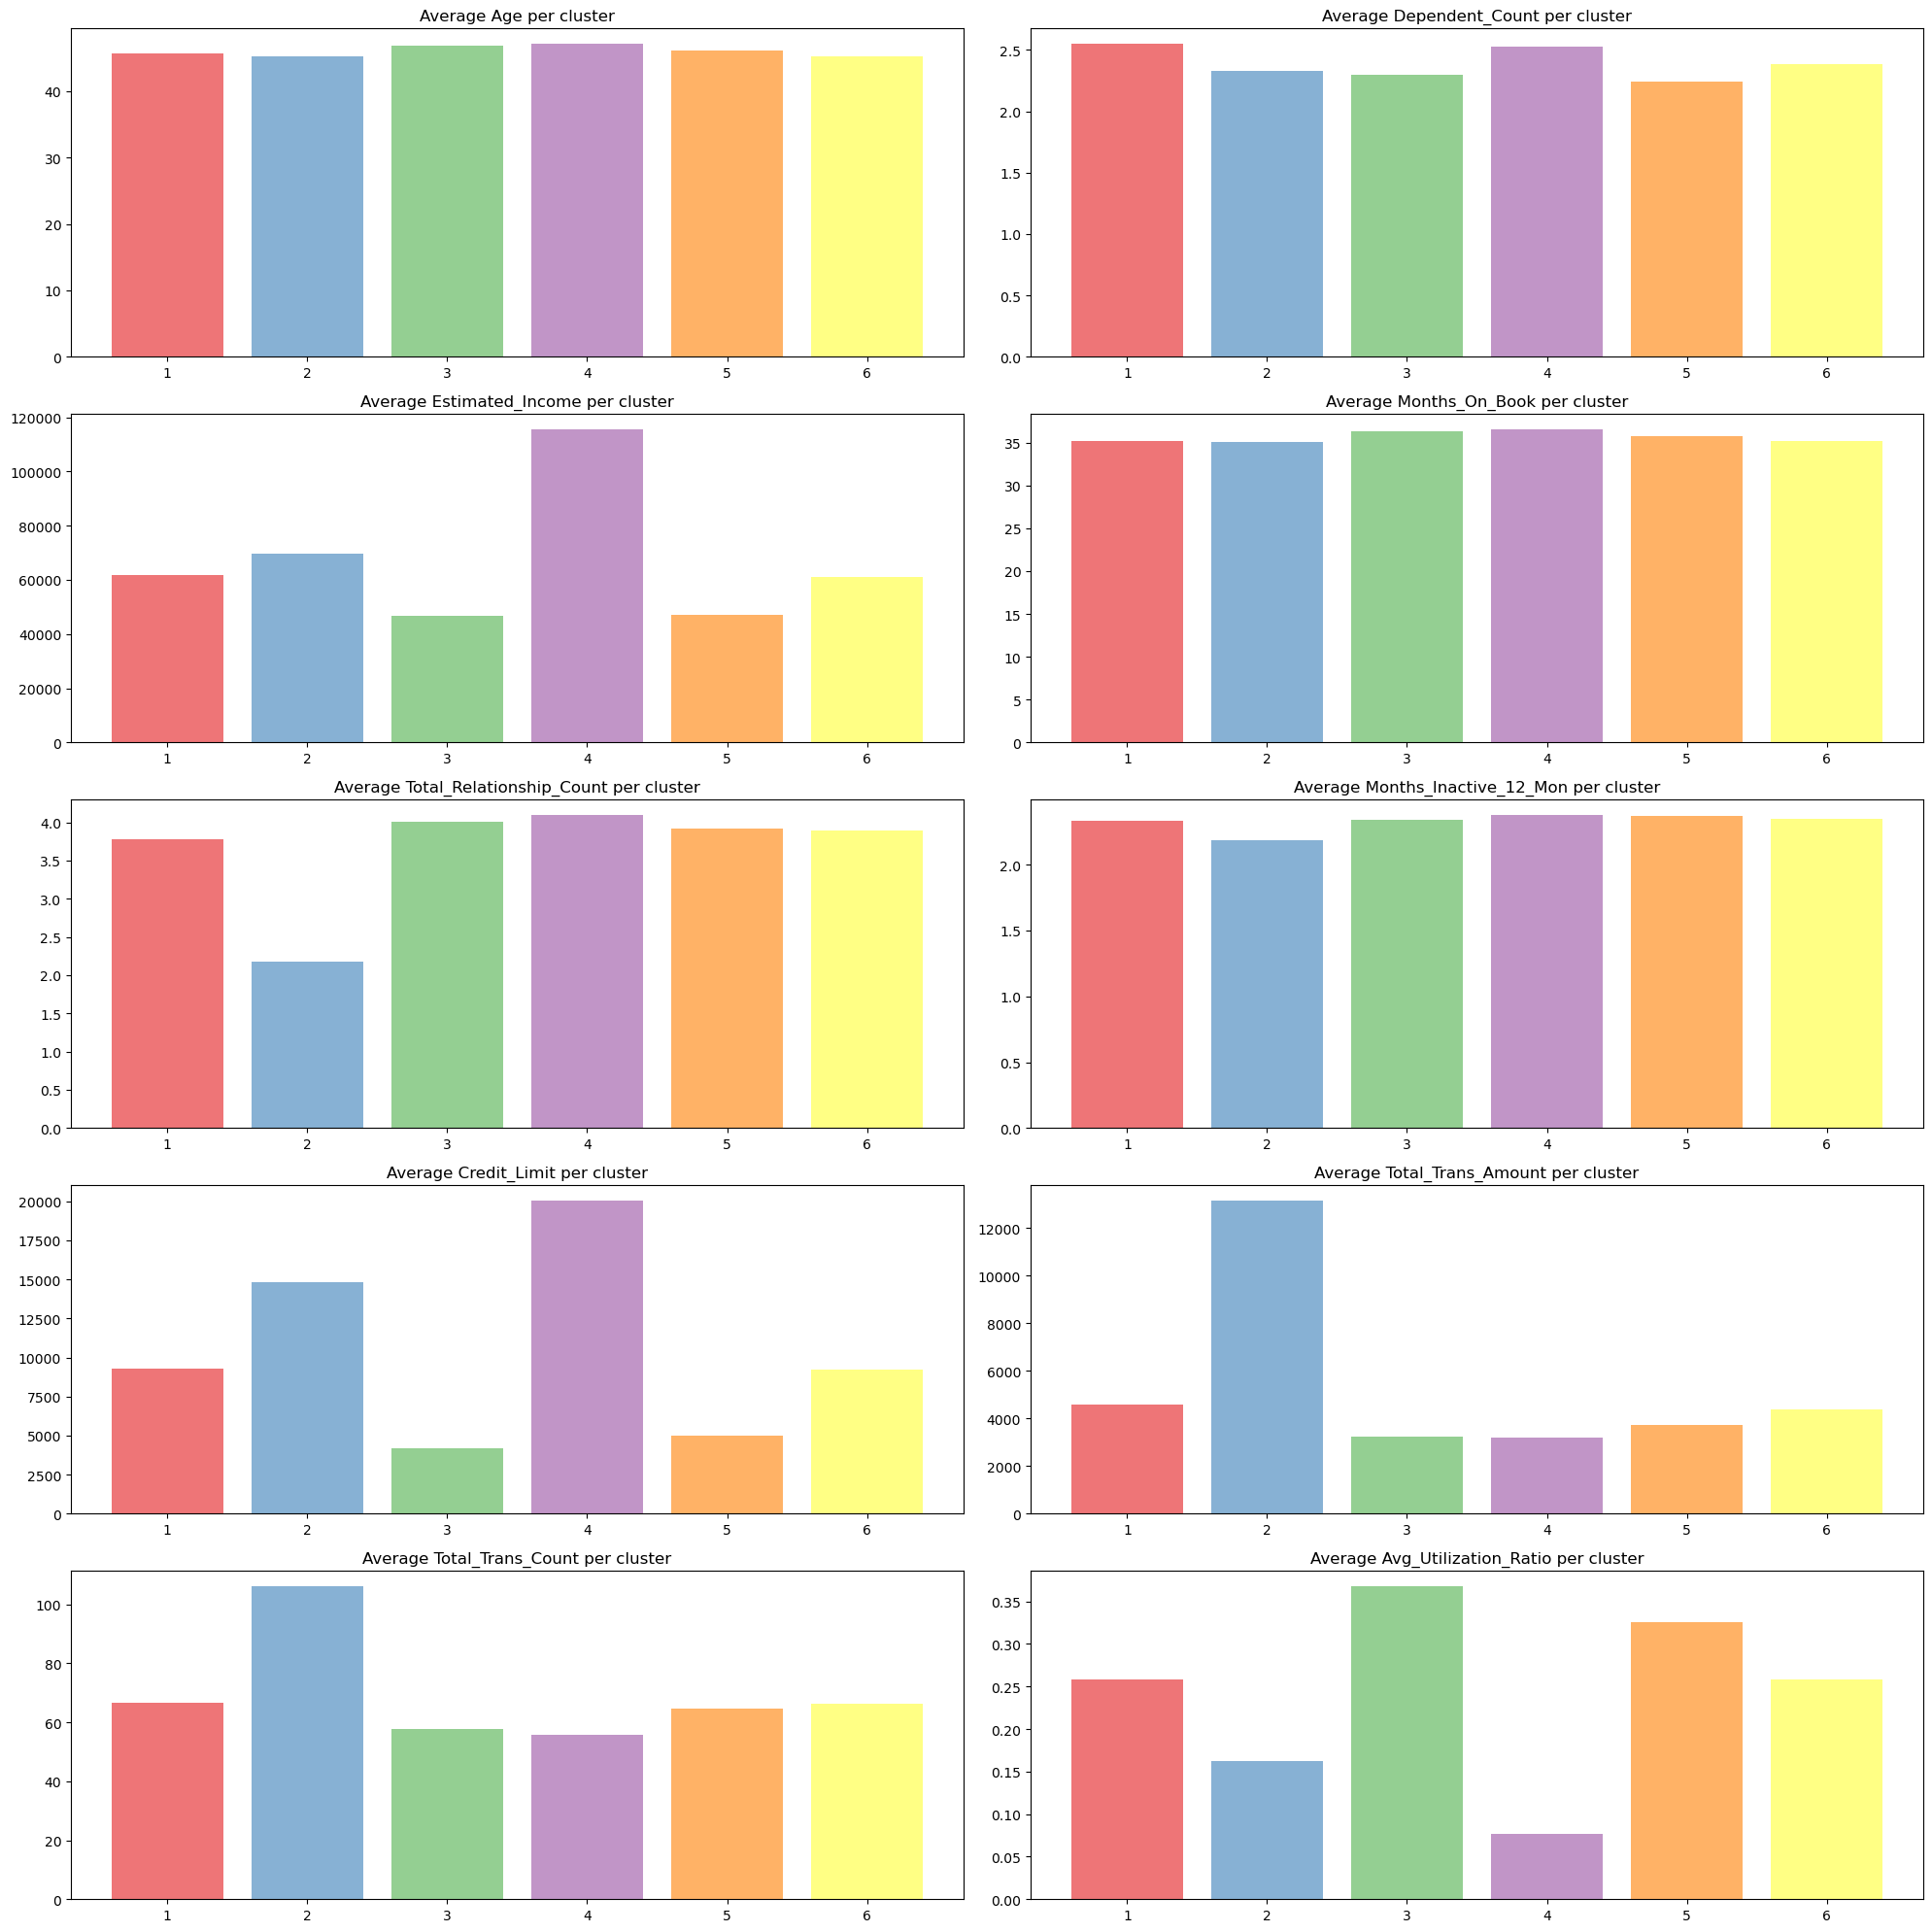

In [63]:
fig = plt.figure(figsize = (20,20))
for i,col in enumerate(numeric_columns.columns):
    ax = fig.add_subplot(5,2,i+1)
    group = customers.groupby('CLUSTER')[col].mean()
    ax.bar(group.index, group, alpha = 0.6, color = sns.color_palette('Set1'))
    ax.set_title(f'Average {col.title()} per cluster')

plt.tight_layout()    
plt.show()    

For those columns that had high correlaion we can use scatterplot to visualize the clusters.

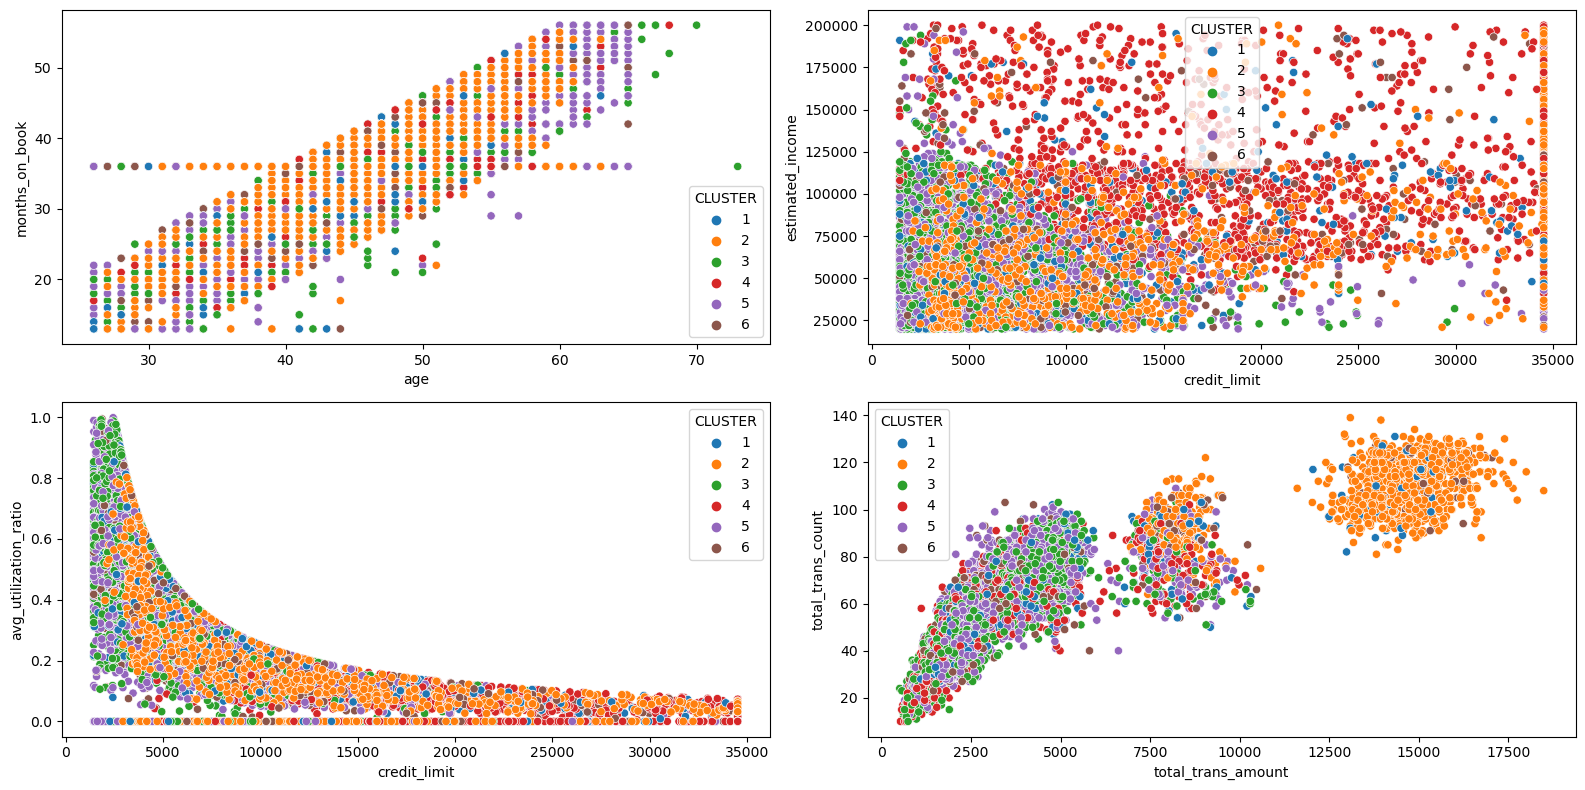

In [64]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize = (16,8))
sns.scatterplot(x = 'age', y = 'months_on_book',hue ='CLUSTER', data = customers, palette = 'tab10', ax = ax1)
sns.scatterplot(x = 'credit_limit', y = 'estimated_income',hue ='CLUSTER', data = customers, palette = 'tab10', ax = ax2)
sns.scatterplot(x = 'credit_limit', y = 'avg_utilization_ratio',hue ='CLUSTER', data = customers, palette = 'tab10', ax = ax3)
sns.scatterplot(x = 'total_trans_amount', y = 'total_trans_count',hue ='CLUSTER', data = customers, palette = 'tab10', ax = ax4)

plt.tight_layout()
plt.show()

We will see the distibution in the object columns

In [52]:
cat_cols = customers.select_dtypes(include = 'object')
cat_cols.head(3)

,gender,education_level,marital_status
0,M,High School,Married
1,F,Graduate,Single
2,M,Graduate,Married


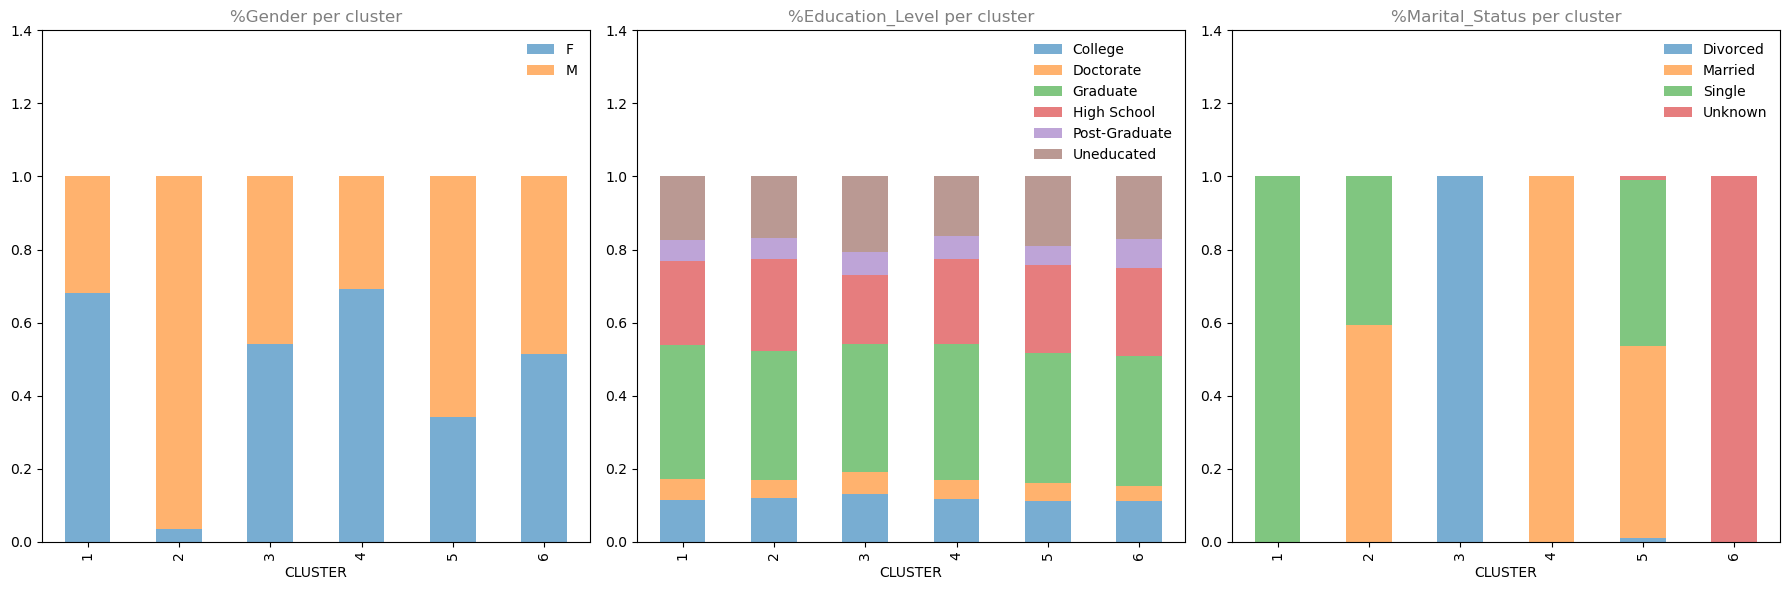

In [55]:
fig = plt.figure(figsize =(18,6))
for i, col in enumerate(cat_cols.columns):
    plot_df = pd.crosstab(index = customers['CLUSTER'],columns = customers[col], values = customers[col], aggfunc = 'size', normalize = 'index')
    ax = fig.add_subplot(1,3,i+1)
    plot_df.plot.bar(stacked = True, ax = ax, alpha = 0.6)
    ax.set_title(f'%{col.title()} per cluster', alpha = 0.5)
    
    ax.set_ylim(0, 1.4)
    ax.legend(frameon=False)
    ax.xaxis.grid(False)
    
plt.tight_layout()
plt.show() 
    

* from the above graphs we can see that cluster 2 is mostly Male.
* The education level is distibuted for all the catergoricals.
* For marital_status cluster 1 is all 'Single', cluster 4 is 'Married' and cluster 6 is 'Unknown'

### Conclusions

#### Cluster 1
characteristics : 
* Marital status is all single. Credit limit is relatively low and total_trans_count is low and moderate. 
* estimated_income is somewhat low and moderate.
* Mostly male

Insights: Since the cluster is with marital_status single and low income and moderate, strategies can be implemented to spent on daily basis for basic assentials.

#### Cluster 2
characteristics : 
* Mostly is male and marital_status is single and married. estimated_income is high and credit_limit is high. 
* Total_trans_count is relatively low and moderate.

Insights: From the above characteristics it is clear the that customers on this cluster have less transaction counts but the transactions have high expenses. Target customer luxery travlling, brands and dining offers.

#### Cluster 3
characteristics : 
* This cluster all the customers are divorced. 
* Estimated income is relatiely low and moderate how ever there is also some customers with high income.
* It has the highest number of observations from all the clusters.
* The cluster has a balanced distribution of females and males.
* Avergage income per cluster is low and somewhat moderate.

Insights: Strategies can be implemented for mostly single parents and single indivuals targeting both genders with cashbacks and reward points.

#### Cluster 4
characteristics : 
* This cluster distibution is mostly females and all married. 
* Somewhat low income, credit limit and trans count.

Insights: Strategies can be implemented for families to increase the total transaction counts to increase the daily usages of the cards with offers for shopping and dining.

#### Cluster 5
characteristics :
* Mostly male but the differenece is not very high.
* Marital status is married and single.
* Somewhat low income but very high total transaction counts
* credit limit is somewhat low but there is customers with high credit limits as well.

Insights: Strategies can be implemented for both genders may be increasing the credit limits and offers and discounts on entertainment.

#### Cluster 6
characteristics :
* The cluster consists of both females and males.
* The marital status is as unknow.
* This cluster consits of the lowest contibution number.
* Estimated income is somewhat low and moderate.

Insights: Since the marital status is unknown its abit difficult to come to a conclusion on the targeted customers, however stratgies can be implemented considering the genders and income to give offers.


In [66]:
#distibution of the cluster of the customers
customers[['customer_id', 'CLUSTER']]

,customer_id,CLUSTER
0,768805383,4
1,818770008,5
2,713982108,4
3,769911858,1
4,709106358,3
...,...,...
10122,772366833,2
10123,710638233,6
10124,716506083,3
10125,717406983,1
